In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Tugas CNN
!ls -a

/content/drive/MyDrive/Tugas CNN
daun  daun.zip	saved_model_cnn  split_folder_daun


In [ ]:
data_dir = "/content/drive/MyDrive/Tugas CNN/daun.zip"

In [ ]:
import os
base_dataset = "daun"
class_dir = ['Jeruk', 'Pandan']
for class_item in class_dir:
  cur_dir = base_dataset+"/"+class_item
  dataset = os.listdir(cur_dir)
  for item in dataset:
    if not item.endswith(".jpg"):
        os.remove(os.path.join(cur_dir, item))

In [ ]:
imagePaths = '/content/drive/MyDrive/Tugas CNN/daun/'
label_list = ['Jeruk', 'Pandan']
data = []
labels = []

In [ ]:
for label in label_list:
    for imagePath in glob.glob(imagePaths+label+'//*.jpg'):
        #print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32))
        data.append(image)
        labels.append(label)

In [ ]:
np.array(data).shape

(100, 32, 32, 3)

In [ ]:
# ubah type data dari list menjadi array
# ubah nilai dari tiap pixel menjadi range [0..1]
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)

In [ ]:
print(labels)

['Jeruk', 'Pandan']


In [ ]:
# ubah nilai dari labels menjadi binary
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)

Ukuran data train = (80, 32, 32, 3)
Ukuran data test = (20, 32, 32, 3)


In [ ]:
model = Sequential()
# Extracted Feature Layer
model.add(InputLayer(input_shape=[32,32,3]))
model.add(Conv2D(filters=32, kernel_size=2, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=50, kernel_size=2, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 50)        6450      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 50)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 8, 50)          0         
                                                                 
 flatten (Flatten)           (None, 3200)              0

In [53]:
# tentukan hyperparameter
lr = 0.001
max_epochs = 100
opt_funct = Adam(learning_rate=lr)

In [54]:
# compile arsitektur yang telah dibuat
model.compile(loss = 'binary_crossentropy', 
              optimizer = opt_funct, 
              metrics = ['accuracy'])

In [ ]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=max_epochs, batch_size=32)

Epoch 1/5
3/3 [==============================] - 2s 357ms/step - loss: 0.7117 - accuracy: 0.5750 - val_loss: 0.5362 - val_accuracy: 0.6000
Epoch 2/5
3/3 [==============================] - 0s 119ms/step - loss: 0.6029 - accuracy: 0.6375 - val_loss: 0.3975 - val_accuracy: 1.0000
Epoch 3/5
3/3 [==============================] - 0s 126ms/step - loss: 0.3311 - accuracy: 0.9375 - val_loss: 0.2097 - val_accuracy: 1.0000
Epoch 4/5
3/3 [==============================] - 0s 112ms/step - loss: 0.2243 - accuracy: 0.9875 - val_loss: 0.1270 - val_accuracy: 1.0000
Epoch 5/5
3/3 [==============================] - 0s 122ms/step - loss: 0.1163 - accuracy: 1.0000 - val_loss: 0.0467 - val_accuracy: 1.0000


In [55]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=max_epochs, batch_size=32)

Epoch 1/100
3/3 [==============================] - 2s 371ms/step - loss: 0.0464 - accuracy: 0.9875 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 2/100
3/3 [==============================] - 0s 144ms/step - loss: 0.0357 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 3/100
3/3 [==============================] - 0s 155ms/step - loss: 0.0285 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 71ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 58ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 8.5146e-04 - val_accuracy: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 59ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 5.3506e-04 - val_accuracy: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 58ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 7.4936e-04 - val_accuracy: 1.0000
Epoch

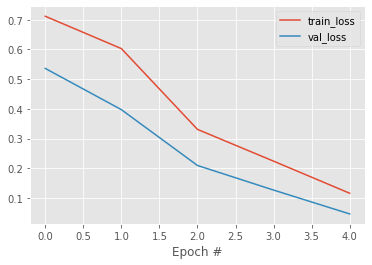

In [ ]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
#plt.plot(N, H.history["accuracy"], label="train_acc")
#plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

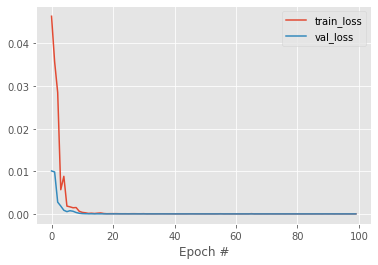

In [56]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
#plt.plot(N, H.history["accuracy"], label="train_acc")
#plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

In [ ]:
# menghitung nilai akurasi model terhadap data test
predictions = model.predict(x_test, batch_size=32)
target = (predictions > 0.5).astype(np.int)
print(classification_report(y_test, target, target_names=label_list))

              precision    recall  f1-score   support

       Jeruk       1.00      1.00      1.00        12
      Pandan       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
model.save('/content/drive/MyDrive/Tugas CNN/saved_model_cnn/ModelCNN.h5')
model.save('/content/drive/MyDrive/Tugas CNN/saved_model_cnn/DropoutModel.h5')

Model : ModelCNN.h5
Predicted Label : Pandan
Probability : 0.94

Model : DropoutModel.h5
Predicted Label : Pandan
Probability : 0.94



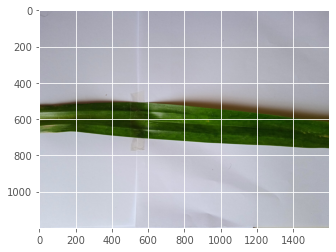

In [ ]:
from PIL import Image
import cv2
from tensorflow.keras.models import  load_model

img_upload = Image.open("/content/drive/MyDrive/Tugas CNN/daun/Pandan/001.jpg")
img_plt = plt.imshow(img_upload)
img = np.array(img_upload)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

model_list = ['/content/drive/MyDrive/Tugas CNN/saved_model_cnn/ModelCNN.h5',
              '/content/drive/MyDrive/Tugas CNN/saved_model_cnn/DropoutModel.h5']
labels = ['Jeruk', 'Pandan']

for m in model_list:
    model = load_model(m)
    size_img = model.layers[0].output_shape[1:2]
    imgs = cv2.resize(img,(2*16, 2*16), interpolation = cv2.INTER_CUBIC)
    imgs = imgs.astype('float32') / 255
    pred = model.predict(np.expand_dims(imgs, axis=0))[0]
    print('Model :', m.split('/')[-1])
    print('Predicted Label :',labels[((pred > 0.5)+0).ravel()[0]])
    print('Probability :',[ round(elem, 2) for elem in pred ][0])
    print('===============\n')

In [ ]:
queryPath = "/content/drive/MyDrive/Tugas CNN/daun/Pandan/001.jpg"
query = cv2.imread(queryPath)
output = query.copy()
query = cv2.resize(query, (32, 32))
q = []
q.append(query)
q = np.array(q, dtype='float') / 255.0

q_pred = model.predict(q)
print(q_pred)

[[0.93883425]]


In [58]:
model.save('/content/drive/MyDrive/Tugas CNN/saved_model_cnn/jeruk_pandan_class_model.h5')